In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import math
import matplotlib.pyplot as plt


from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

## Подготовка данных

In [5]:
data = pd.read_csv('A_Z Handwritten Data.csv')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 372450 entries, 0 to 372449
Columns: 785 entries, 0 to 0.648
dtypes: int64(785)
memory usage: 2.2 GB


In [7]:
data.describe()

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
count,372450.000000,372450.0,372450.0,372450.0,372450.0,372450.0,372450.0,372450.0,372450.0,372450.0,...,372450.000000,372450.000000,372450.000000,372450.000000,372450.000000,372450.000000,372450.000000,372450.000000,372450.000000,372450.000000
mean,13.523490,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.001616,0.001592,0.001117,0.000929,0.000685,0.000596,0.000618,0.000690,0.000239,0.000011
std,6.740824,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.490788,0.517297,0.421332,0.419180,0.385566,0.319820,0.208942,0.335227,0.134852,0.006554
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,14.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,18.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,25.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,252.000000,226.000000,229.000000,228.000000,235.000000,194.000000,103.000000,198.000000,82.000000,4.000000


In [8]:
data.head()

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


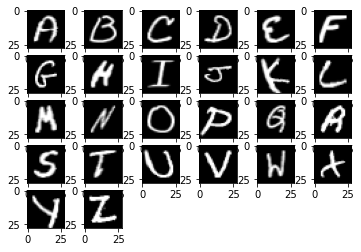

In [9]:
for i in range(26):
    dd = data[data['0']==i].iloc[1]
    x = dd[1:].values
    x = x.reshape((28, 28))
    im = plt.subplot(5, 6, i+1)
    im.imshow(x, cmap='gray')

In [10]:
X = data.iloc[:, 1:].values
y = data.iloc[:, 0].values

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

## Обучим на случайном лесу

In [12]:
rfc = Pipeline([('scaler', StandardScaler()), ('RandomForestClassifier', RandomForestClassifier(n_jobs=-1, random_state=42))])

In [13]:
rfc.fit(X_train, y_train).score(X_test, y_test)

0.9875688011813666

In [14]:
y_pred = rfc.predict(X_test)
f1_score(y_test, y_pred, average='weighted')

0.9875412180915497

## Обучим простую CNN

In [1]:
!pip install torch

Defaulting to user installation because normal site-packages is not writeable
  Using cached torch-2.3.1-cp310-cp310-manylinux1_x86_64.whl (779.1 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached networkx-3.3-py3-none-any.whl (1.7 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached typing_extensions-4.12.1-py3-none-any.whl (37 kB)
  Using cached triton-2.3.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (168.1 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 KB 305.8 kB/s eta 0:00:00 kB/s eta 0:00:01
     ━━━━━━━━

In [4]:
!pip install torchvision

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 1.4 MB/s eta 0:00:00m eta 0:00:010:00:010m


In [7]:
import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as f
from torch.utils.data import Dataset,DataLoader


from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

## Разбиние на тренировочную, валидационную и тестовую выборку

In [8]:
data = np.loadtxt(fname = 'A_Z Handwritten Data.csv', delimiter = ',', dtype = np.float32,skiprows = 1)

train, v_t = train_test_split(data, test_size = 0.4,random_state = 42)
test_X, val_X, test_y, val_y = train_test_split(v_t[:,1:], v_t[:, 0], test_size = 0.4)

test_X = torch.tensor(test_X).view(test_X.shape[0], 28, 28).unsqueeze(dim = 1) 
val_X = torch.tensor(val_X).view(val_X.shape[0], 28, 28).unsqueeze(dim = 1)
test_y = torch.tensor(test_y,dtype = torch.long)
val_y = torch.tensor(val_y,dtype = torch.long)

# batches to train
batches = np.split(train,[math.ceil(train.shape[0] * (i / 150)) for i in range(150) ]) 

In [9]:
class Loader:
    def __init__(self,data):
        self.trainx,self.trainy=data[:,1:],data[:,0]
        self.length = self.trainx.shape[0]
        
    def __getitem__(self,index):
        x,y=torch.tensor(self.trainx),torch.tensor(self.trainy)
        x,y=x.view(x.shape[0],28,28).unsqueeze(dim=1),y
        return x[index],y[index]
    
    def __len__(self):
        return self.length

In [10]:
class CNN_RECOG(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 6, kernel_size = 3, padding = 1)
        self.maxpool = nn.MaxPool2d(2)
        self.conv2 = nn.Conv2d(6, 10, kernel_size = 3, padding = 1)
        self.linear1 = nn.Linear(10 * 7 * 7, 100)
        self.linear2 = nn.Linear(100, 26)
        
    def forward(self,x):
        x = self.maxpool(f.relu(self.conv1(x)))
        x = self.maxpool(f.relu(self.conv2(x)))
        x = x.view(-1, 10 * 7 * 7)
        x = f.relu(self.linear1(x))
        x = f.relu(self.linear2(x))
        return x

In [12]:
learning_rate = 0.01
model = CNN_RECOG()
loss = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

In [13]:
tr_loss, val_loss = [], [] 
val_acc = []
# за одну эпоху
for batch in batches:
    datasets = Loader(batch)
    data_load = DataLoader(dataset = datasets, batch_size = 500)
    


    for i, (x, y) in enumerate(data_load):
        preds = model.forward(x)
        tr_ls = loss(preds, torch.tensor(y, dtype = torch.long))
        tr_ls.backward()
        optimizer.step()
        optimizer.zero_grad()
        tr_loss.append(tr_ls.detach())


        with torch.no_grad():
            v_x, v_y = val_x, val_y
            pr = model.forward(v_x)
            val_ls = loss(pr,torch.tensor(v_y,dtype=torch.long))
            val_loss.append(val_ls)
            pr = pr.argmax(dim = 1)
            acc = accuracy_score(pr,v_y)
            val_acc.append(acc)

/tmp/ipykernel_17890/3679684681.py:12: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  tr_ls = loss(preds, torch.tensor(y, dtype = torch.long))
/tmp/ipykernel_17890/3679684681.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  val_ls = loss(pr,torch.tensor(v_y,dtype=torch.long))
/tmp/ipykernel_17890/3679684681.py:12: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  tr_ls = loss(preds, torch.tensor(y, dtype = torch.long))
/tmp/ipykernel_17890/3679684681.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor

/tmp/ipykernel_17890/3679684681.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  val_ls = loss(pr,torch.tensor(v_y,dtype=torch.long))
/tmp/ipykernel_17890/3679684681.py:12: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  tr_ls = loss(preds, torch.tensor(y, dtype = torch.long))
/tmp/ipykernel_17890/3679684681.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  val_ls = loss(pr,torch.tensor(v_y,dtype=torch.long))
/tmp/ipykernel_17890/3679684681.py:12: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clo

/tmp/ipykernel_17890/3679684681.py:12: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  tr_ls = loss(preds, torch.tensor(y, dtype = torch.long))
/tmp/ipykernel_17890/3679684681.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  val_ls = loss(pr,torch.tensor(v_y,dtype=torch.long))
/tmp/ipykernel_17890/3679684681.py:12: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  tr_ls = loss(preds, torch.tensor(y, dtype = torch.long))
/tmp/ipykernel_17890/3679684681.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor

/tmp/ipykernel_17890/3679684681.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  val_ls = loss(pr,torch.tensor(v_y,dtype=torch.long))
/tmp/ipykernel_17890/3679684681.py:12: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  tr_ls = loss(preds, torch.tensor(y, dtype = torch.long))
/tmp/ipykernel_17890/3679684681.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  val_ls = loss(pr,torch.tensor(v_y,dtype=torch.long))
/tmp/ipykernel_17890/3679684681.py:12: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clo

/tmp/ipykernel_17890/3679684681.py:12: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  tr_ls = loss(preds, torch.tensor(y, dtype = torch.long))
/tmp/ipykernel_17890/3679684681.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  val_ls = loss(pr,torch.tensor(v_y,dtype=torch.long))
/tmp/ipykernel_17890/3679684681.py:12: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  tr_ls = loss(preds, torch.tensor(y, dtype = torch.long))
/tmp/ipykernel_17890/3679684681.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor

/tmp/ipykernel_17890/3679684681.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  val_ls = loss(pr,torch.tensor(v_y,dtype=torch.long))
/tmp/ipykernel_17890/3679684681.py:12: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  tr_ls = loss(preds, torch.tensor(y, dtype = torch.long))
/tmp/ipykernel_17890/3679684681.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  val_ls = loss(pr,torch.tensor(v_y,dtype=torch.long))
/tmp/ipykernel_17890/3679684681.py:12: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clo

/tmp/ipykernel_17890/3679684681.py:12: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  tr_ls = loss(preds, torch.tensor(y, dtype = torch.long))
/tmp/ipykernel_17890/3679684681.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  val_ls = loss(pr,torch.tensor(v_y,dtype=torch.long))
/tmp/ipykernel_17890/3679684681.py:12: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  tr_ls = loss(preds, torch.tensor(y, dtype = torch.long))
/tmp/ipykernel_17890/3679684681.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor

/tmp/ipykernel_17890/3679684681.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  val_ls = loss(pr,torch.tensor(v_y,dtype=torch.long))
/tmp/ipykernel_17890/3679684681.py:12: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  tr_ls = loss(preds, torch.tensor(y, dtype = torch.long))
/tmp/ipykernel_17890/3679684681.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  val_ls = loss(pr,torch.tensor(v_y,dtype=torch.long))
/tmp/ipykernel_17890/3679684681.py:12: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clo

/tmp/ipykernel_17890/3679684681.py:12: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  tr_ls = loss(preds, torch.tensor(y, dtype = torch.long))
/tmp/ipykernel_17890/3679684681.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  val_ls = loss(pr,torch.tensor(v_y,dtype=torch.long))
/tmp/ipykernel_17890/3679684681.py:12: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  tr_ls = loss(preds, torch.tensor(y, dtype = torch.long))
/tmp/ipykernel_17890/3679684681.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor

/tmp/ipykernel_17890/3679684681.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  val_ls = loss(pr,torch.tensor(v_y,dtype=torch.long))
/tmp/ipykernel_17890/3679684681.py:12: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  tr_ls = loss(preds, torch.tensor(y, dtype = torch.long))
/tmp/ipykernel_17890/3679684681.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  val_ls = loss(pr,torch.tensor(v_y,dtype=torch.long))
/tmp/ipykernel_17890/3679684681.py:12: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clo

/tmp/ipykernel_17890/3679684681.py:12: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  tr_ls = loss(preds, torch.tensor(y, dtype = torch.long))
/tmp/ipykernel_17890/3679684681.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  val_ls = loss(pr,torch.tensor(v_y,dtype=torch.long))
/tmp/ipykernel_17890/3679684681.py:12: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  tr_ls = loss(preds, torch.tensor(y, dtype = torch.long))
/tmp/ipykernel_17890/3679684681.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor

/tmp/ipykernel_17890/3679684681.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  val_ls = loss(pr,torch.tensor(v_y,dtype=torch.long))
/tmp/ipykernel_17890/3679684681.py:12: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  tr_ls = loss(preds, torch.tensor(y, dtype = torch.long))
/tmp/ipykernel_17890/3679684681.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  val_ls = loss(pr,torch.tensor(v_y,dtype=torch.long))
/tmp/ipykernel_17890/3679684681.py:12: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clo

/tmp/ipykernel_17890/3679684681.py:12: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  tr_ls = loss(preds, torch.tensor(y, dtype = torch.long))
/tmp/ipykernel_17890/3679684681.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  val_ls = loss(pr,torch.tensor(v_y,dtype=torch.long))
/tmp/ipykernel_17890/3679684681.py:12: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  tr_ls = loss(preds, torch.tensor(y, dtype = torch.long))
/tmp/ipykernel_17890/3679684681.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor

/tmp/ipykernel_17890/3679684681.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  val_ls = loss(pr,torch.tensor(v_y,dtype=torch.long))
/tmp/ipykernel_17890/3679684681.py:12: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  tr_ls = loss(preds, torch.tensor(y, dtype = torch.long))
/tmp/ipykernel_17890/3679684681.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  val_ls = loss(pr,torch.tensor(v_y,dtype=torch.long))
/tmp/ipykernel_17890/3679684681.py:12: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clo

/tmp/ipykernel_17890/3679684681.py:12: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  tr_ls = loss(preds, torch.tensor(y, dtype = torch.long))
/tmp/ipykernel_17890/3679684681.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  val_ls = loss(pr,torch.tensor(v_y,dtype=torch.long))
/tmp/ipykernel_17890/3679684681.py:12: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  tr_ls = loss(preds, torch.tensor(y, dtype = torch.long))
/tmp/ipykernel_17890/3679684681.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor

/tmp/ipykernel_17890/3679684681.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  val_ls = loss(pr,torch.tensor(v_y,dtype=torch.long))
/tmp/ipykernel_17890/3679684681.py:12: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  tr_ls = loss(preds, torch.tensor(y, dtype = torch.long))
/tmp/ipykernel_17890/3679684681.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  val_ls = loss(pr,torch.tensor(v_y,dtype=torch.long))
/tmp/ipykernel_17890/3679684681.py:12: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clo

/tmp/ipykernel_17890/3679684681.py:12: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  tr_ls = loss(preds, torch.tensor(y, dtype = torch.long))
/tmp/ipykernel_17890/3679684681.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  val_ls = loss(pr,torch.tensor(v_y,dtype=torch.long))
/tmp/ipykernel_17890/3679684681.py:12: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  tr_ls = loss(preds, torch.tensor(y, dtype = torch.long))
/tmp/ipykernel_17890/3679684681.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor

/tmp/ipykernel_17890/3679684681.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  val_ls = loss(pr,torch.tensor(v_y,dtype=torch.long))
/tmp/ipykernel_17890/3679684681.py:12: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  tr_ls = loss(preds, torch.tensor(y, dtype = torch.long))
/tmp/ipykernel_17890/3679684681.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  val_ls = loss(pr,torch.tensor(v_y,dtype=torch.long))
/tmp/ipykernel_17890/3679684681.py:12: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clo

/tmp/ipykernel_17890/3679684681.py:12: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  tr_ls = loss(preds, torch.tensor(y, dtype = torch.long))
/tmp/ipykernel_17890/3679684681.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  val_ls = loss(pr,torch.tensor(v_y,dtype=torch.long))
/tmp/ipykernel_17890/3679684681.py:12: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  tr_ls = loss(preds, torch.tensor(y, dtype = torch.long))
/tmp/ipykernel_17890/3679684681.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor

/tmp/ipykernel_17890/3679684681.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  val_ls = loss(pr,torch.tensor(v_y,dtype=torch.long))
/tmp/ipykernel_17890/3679684681.py:12: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  tr_ls = loss(preds, torch.tensor(y, dtype = torch.long))
/tmp/ipykernel_17890/3679684681.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  val_ls = loss(pr,torch.tensor(v_y,dtype=torch.long))
/tmp/ipykernel_17890/3679684681.py:12: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clo

/tmp/ipykernel_17890/3679684681.py:12: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  tr_ls = loss(preds, torch.tensor(y, dtype = torch.long))
/tmp/ipykernel_17890/3679684681.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  val_ls = loss(pr,torch.tensor(v_y,dtype=torch.long))
/tmp/ipykernel_17890/3679684681.py:12: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  tr_ls = loss(preds, torch.tensor(y, dtype = torch.long))
/tmp/ipykernel_17890/3679684681.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor

/tmp/ipykernel_17890/3679684681.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  val_ls = loss(pr,torch.tensor(v_y,dtype=torch.long))
/tmp/ipykernel_17890/3679684681.py:12: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  tr_ls = loss(preds, torch.tensor(y, dtype = torch.long))
/tmp/ipykernel_17890/3679684681.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  val_ls = loss(pr,torch.tensor(v_y,dtype=torch.long))
/tmp/ipykernel_17890/3679684681.py:12: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clo

/tmp/ipykernel_17890/3679684681.py:12: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  tr_ls = loss(preds, torch.tensor(y, dtype = torch.long))
/tmp/ipykernel_17890/3679684681.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  val_ls = loss(pr,torch.tensor(v_y,dtype=torch.long))
/tmp/ipykernel_17890/3679684681.py:12: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  tr_ls = loss(preds, torch.tensor(y, dtype = torch.long))
/tmp/ipykernel_17890/3679684681.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor

/tmp/ipykernel_17890/3679684681.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  val_ls = loss(pr,torch.tensor(v_y,dtype=torch.long))
/tmp/ipykernel_17890/3679684681.py:12: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  tr_ls = loss(preds, torch.tensor(y, dtype = torch.long))
/tmp/ipykernel_17890/3679684681.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  val_ls = loss(pr,torch.tensor(v_y,dtype=torch.long))
/tmp/ipykernel_17890/3679684681.py:12: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clo

/tmp/ipykernel_17890/3679684681.py:12: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  tr_ls = loss(preds, torch.tensor(y, dtype = torch.long))
/tmp/ipykernel_17890/3679684681.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  val_ls = loss(pr,torch.tensor(v_y,dtype=torch.long))
/tmp/ipykernel_17890/3679684681.py:12: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  tr_ls = loss(preds, torch.tensor(y, dtype = torch.long))
/tmp/ipykernel_17890/3679684681.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor

/tmp/ipykernel_17890/3679684681.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  val_ls = loss(pr,torch.tensor(v_y,dtype=torch.long))
/tmp/ipykernel_17890/3679684681.py:12: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  tr_ls = loss(preds, torch.tensor(y, dtype = torch.long))
/tmp/ipykernel_17890/3679684681.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  val_ls = loss(pr,torch.tensor(v_y,dtype=torch.long))
/tmp/ipykernel_17890/3679684681.py:12: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clo

/tmp/ipykernel_17890/3679684681.py:12: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  tr_ls = loss(preds, torch.tensor(y, dtype = torch.long))
/tmp/ipykernel_17890/3679684681.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  val_ls = loss(pr,torch.tensor(v_y,dtype=torch.long))
/tmp/ipykernel_17890/3679684681.py:12: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  tr_ls = loss(preds, torch.tensor(y, dtype = torch.long))
/tmp/ipykernel_17890/3679684681.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor

/tmp/ipykernel_17890/3679684681.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  val_ls = loss(pr,torch.tensor(v_y,dtype=torch.long))
/tmp/ipykernel_17890/3679684681.py:12: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  tr_ls = loss(preds, torch.tensor(y, dtype = torch.long))
/tmp/ipykernel_17890/3679684681.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  val_ls = loss(pr,torch.tensor(v_y,dtype=torch.long))
/tmp/ipykernel_17890/3679684681.py:12: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clo

/tmp/ipykernel_17890/3679684681.py:12: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  tr_ls = loss(preds, torch.tensor(y, dtype = torch.long))
/tmp/ipykernel_17890/3679684681.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  val_ls = loss(pr,torch.tensor(v_y,dtype=torch.long))
/tmp/ipykernel_17890/3679684681.py:12: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  tr_ls = loss(preds, torch.tensor(y, dtype = torch.long))
/tmp/ipykernel_17890/3679684681.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor

/tmp/ipykernel_17890/3679684681.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  val_ls = loss(pr,torch.tensor(v_y,dtype=torch.long))
/tmp/ipykernel_17890/3679684681.py:12: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  tr_ls = loss(preds, torch.tensor(y, dtype = torch.long))
/tmp/ipykernel_17890/3679684681.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  val_ls = loss(pr,torch.tensor(v_y,dtype=torch.long))
/tmp/ipykernel_17890/3679684681.py:12: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clo

/tmp/ipykernel_17890/3679684681.py:12: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  tr_ls = loss(preds, torch.tensor(y, dtype = torch.long))
/tmp/ipykernel_17890/3679684681.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  val_ls = loss(pr,torch.tensor(v_y,dtype=torch.long))
/tmp/ipykernel_17890/3679684681.py:12: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  tr_ls = loss(preds, torch.tensor(y, dtype = torch.long))
/tmp/ipykernel_17890/3679684681.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor

/tmp/ipykernel_17890/3679684681.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  val_ls = loss(pr,torch.tensor(v_y,dtype=torch.long))


## График лосса на тестовой и валидационной выборке

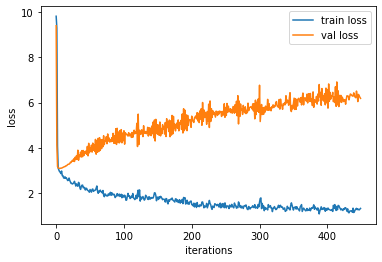

In [14]:
plt.plot([i for i in range(len(tr_loss))],tr_loss)
plt.plot([i for i in range(len(val_loss))],val_loss)
plt.xlabel('iterations')
plt.ylabel('loss')
plt.legend(['train loss','val loss'])
plt.show()

In [15]:
print(f"training _loss = {tr_loss[-1].item()}")
print(f"validation_loss_final = {val_loss[-1].item()}")

training _loss = 1.3287005424499512
validation_loss_final = 6.186609745025635


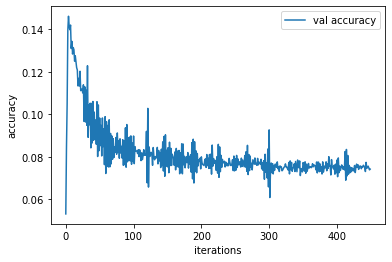

In [16]:
plt.plot([i for i in range(len(val_acc))],val_acc)
plt.xlabel('iterations')
plt.ylabel('accuracy')
plt.legend(['val accuracy'])
plt.show()

In [17]:
print('validation_accuracy = ',val_acc[-1]) 

validation_accuracy =  0.07427171432407034


## MODEL ON TEST

In [23]:
pr = model.forward(test_X)
pr = pr.argmax(dim = 1)
print(f1_score(pr,test_y,average='weighted'))

0.7165728915102302
